In [1]:
import pandas as pd
import seaborn as sns
import psycopg2 as pgp
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:


conn = pgp.connect("dbname=bdttn01 user=postgres password=postgres")


In [4]:
sql = "select * from dttn.train_stdev"
df2=pd.read_sql(sql, conn)
df2.head()

,id,clase,financieradev,financieramed,comercialdev,comercialmed,mensualdev,mensualmed,anualdev,anualmed,conclusiondev,conclusionmde,otrosdev,otrosmde,profesionalesdev,profesionalesmed,netdev,netomed
0,3,0,0.000000,0.000,0.000000,0.00,15196.666667,5698.750,5.355106e+05,756034.750,398660.0,149497.5,0.0,0.0,174.000000,65.250,3.664716e+05,1.084869e+06
1,5,0,399919.080949,708552.625,265346.820336,553987.00,82757.000000,31033.875,1.807854e+06,2712311.500,1712680.0,642255.0,0.0,0.0,0.000000,0.000,1.106310e+06,4.039202e+06
2,37,0,0.000000,0.000,0.000000,0.00,28561.333333,10710.500,7.156654e+05,1023912.375,482952.0,181107.0,0.0,0.0,6072.000000,2277.000,4.765107e+05,1.436956e+06
3,40,2,0.000000,0.000,0.000000,0.00,23666.000000,8874.750,4.821602e+05,689032.125,366456.0,137421.0,0.0,0.0,6429.666667,2411.125,3.426405e+05,9.921057e+05
4,45,0,395078.604940,789281.000,361027.848582,642984.75,90642.333333,33990.875,2.169645e+06,3248754.250,1634904.0,613089.0,0.0,0.0,0.000000,0.000,1.402132e+06,4.856975e+06


In [6]:
df3=df2
scaler = StandardScaler()
pca = PCA(n_components=3)

In [7]:
features = df3.drop(labels=["id","clase"], axis="columns")
features.head()

,financieradev,financieramed,comercialdev,comercialmed,mensualdev,mensualmed,anualdev,anualmed,conclusiondev,conclusionmde,otrosdev,otrosmde,profesionalesdev,profesionalesmed,netdev,netomed
0,0.000000,0.000,0.000000,0.00,15196.666667,5698.750,5.355106e+05,756034.750,398660.0,149497.5,0.0,0.0,174.000000,65.250,3.664716e+05,1.084869e+06
1,399919.080949,708552.625,265346.820336,553987.00,82757.000000,31033.875,1.807854e+06,2712311.500,1712680.0,642255.0,0.0,0.0,0.000000,0.000,1.106310e+06,4.039202e+06
2,0.000000,0.000,0.000000,0.00,28561.333333,10710.500,7.156654e+05,1023912.375,482952.0,181107.0,0.0,0.0,6072.000000,2277.000,4.765107e+05,1.436956e+06
3,0.000000,0.000,0.000000,0.00,23666.000000,8874.750,4.821602e+05,689032.125,366456.0,137421.0,0.0,0.0,6429.666667,2411.125,3.426405e+05,9.921057e+05
4,395078.604940,789281.000,361027.848582,642984.75,90642.333333,33990.875,2.169645e+06,3248754.250,1634904.0,613089.0,0.0,0.0,0.000000,0.000,1.402132e+06,4.856975e+06


In [8]:
scaler.fit(features)
scaled_data = scaler.transform(features)


In [9]:
pca.fit(scaled_data)

PCA(n_components=3)

In [10]:
x_pca = pca.transform(scaled_data)

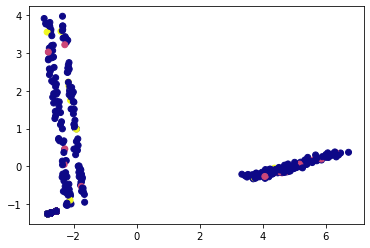

In [11]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df3["clase"],cmap='plasma')


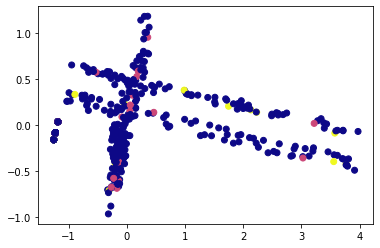

In [12]:
plt.scatter(x_pca[:,1], x_pca[:,2], c=df3["clase"],cmap='plasma')



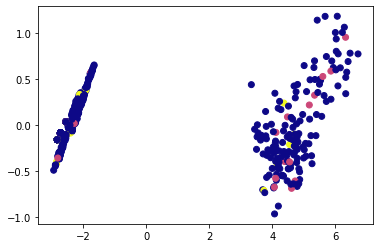

In [13]:
plt.scatter(x_pca[:,0], x_pca[:,2], c=df3["clase"],cmap='plasma')



In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

KMeans(n_clusters=3)

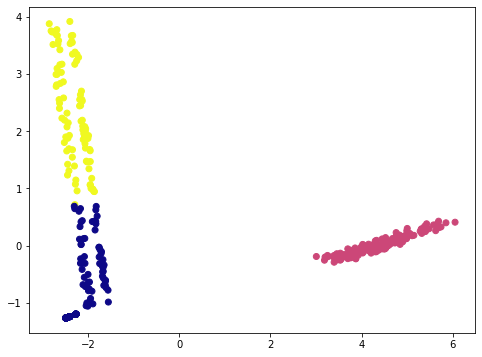

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_,cmap='plasma')

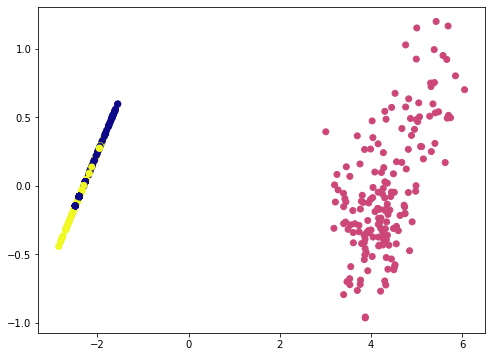

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,2], c=kmeans.labels_,cmap='plasma')

In [40]:
real = df3["clase"]
data= {'real': real,
       'prediccion': kmeans.labels_
       }
df = pd.DataFrame(data, columns=['real','prediccion'])
confusion_matrix = pd.crosstab(df['real'], df['prediccion'], rownames=['real'], colnames=['prediccion'], margins = True, normalize=True)

prediccion      0      1      2    All
real                                  
0           0.428  0.306  0.172  0.906
1           0.016  0.028  0.004  0.048
2           0.022  0.010  0.014  0.046
All         0.466  0.344  0.190  1.000


<AxesSubplot:xlabel='prediccion', ylabel='real'>

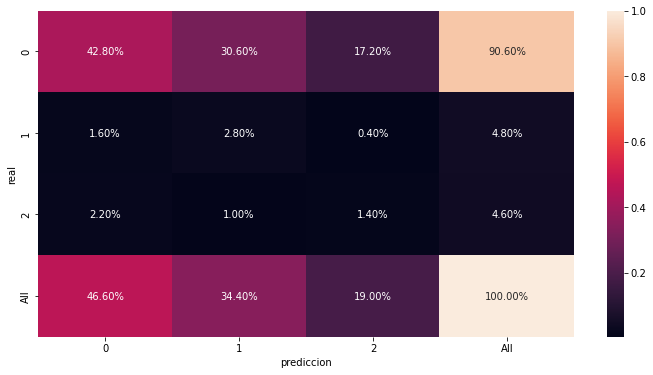

In [41]:
print(confusion_matrix)
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2%")